# I rischi del fumo

## I dati che ci servono

L'idea dalla cui partiamo è di visualizzare il collegamento fra il fumo e il cancro ai polmoni --- non ci proponiamo di fare uno studio scientifico al riguardo, ma semplicemente di guardare i dati esistenti e vedere quanto è evidente la correlazione che ci aspettiamo di vedere.

Ci servono dei dati!
Un ottimo posto dove trovarne, specie per questioni sociali come queste, è __Our World in Data__, un progetto dell'[Università di Oxford](https://ourworldindata.org/about) per la diffusione e comunicazioni dei dati riguardanti i principali problemi del mondo moderno.
È un'ottima risorsa in generale, e spesso lì possiamo trovare grafici che già illustrano molto bene i temi che ci interessano. 

Per oggi, però, ciò che ci fa comodo è che i loro dati

- arrivano da [fonti](https://ourworldindata.org/smoking#data-sources) attendibili (paper su Nature, The Lancet, il New England Journal of Medicine)
- sono facilmente scaricabili in formato `csv` (comma-separated values)

Iniziamo allora recuperando i dati relativi al nostro problema. 
Se doveste fare questa operazione per conto vostro, dopo un po' di ricerca trovereste le pagine di Our World in Data sulla [vendite di sigarette](https://ourworldindata.org/grapher/sales-of-cigarettes-per-adult-per-day) e sulla [morte per cancro ai polmoni](https://ourworldindata.org/grapher/lung-cancer-deaths-per-100000-by-sex-1950-2002), dove c'è un'opzione "Download".

Per accelerare la questione, la prossima cella fa questa operazione in automatico, prendendo i dati non da OWiD direttamente ma da una 
copia che sta in una [repository](https://github.com/jacopok/graphing-tutorial) su github dove trovate tutto il codice per queste sessioni.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import requests

urls = [
        "https://raw.githubusercontent.com/jacopok/graphing-tutorial/main/data/lung-cancer-deaths-per-100000-by-sex-1950-2002.csv",
        "https://raw.githubusercontent.com/jacopok/graphing-tutorial/main/data/sales-of-cigarettes-per-adult-per-day.csv"
        ]

if not os.path.isdir('data'):
  os.mkdir('data')

for url in urls:
  filename = os.path.basename(url)
  path = os.path.join('data', filename)
  print(f'Downloading: {filename}')
  with open(path,'wb') as file:
      data = requests.get(url)
      
      if file.write(data.content):
        print(f'Available at {path}\n')

Downloading: lung-cancer-deaths-per-100000-by-sex-1950-2002.csv
Available at data/lung-cancer-deaths-per-100000-by-sex-1950-2002.csv

Downloading: sales-of-cigarettes-per-adult-per-day.csv
Available at data/sales-of-cigarettes-per-adult-per-day.csv



## Mettere i dati in array

Ora potete guardare nei files disponibili per questo notebook (icona di "cartella" a sinistra). 
Questi dataset contengono informazioni per un gran numero di nazioni, ma noi ci concentreremo su una nello specifico. 
Nel concreto guarderemo gli Stati Uniti (in tutta onestà perché i dati sono molto chiari in quel caso), ma come si cerca di fare programmando teniamo il nostro codice generale: definiamo una variabile `CODE` inizializzata al valore `'USA'`, che useremo per selezionare solo alcune righe della tabella; facendo così in futuro sarà facile cambiare nazione. 


In [ ]:
CODE = 'USA'

# creiamo un "dataframe" che contenga i dati
deaths_df = pd.read_csv('data/lung-cancer-deaths-per-100000-by-sex-1950-2002.csv')

# selezioniamo solo quelli corrispondenti alla nazione selezionata
# "setacciare"
deaths_df = deaths_df[deaths_df.Code == CODE]

# i dati sono presentati divisi per sesso, noi guarderemo un aggregato: 
# facciamo una media per semplicità, anche se ciò non è molto preciso 
deaths = (
    deaths_df['Female lung cancer deaths (per 100,000) (WHO (IARC) (2016))'] +
    deaths_df['Male lung cancer deaths per 100,000 (WHO (IARC) (2016))']
).to_numpy() / 2.

# definiamo anche un array con gli anni corrispondenti a questi
# tassi di mortalità

years_deaths = deaths_df['Year'].to_numpy()

# facciamo operazioni analoghe per le vendite di sigarette

sales_df = pd.read_csv('data/sales-of-cigarettes-per-adult-per-day.csv')
sales_df = sales_df[sales_df.Code == CODE]
sales = sales_df['Sales of cigarettes per adult per day (International Smoking Statistics (2017)) '].to_numpy()
years_sales = sales_df['Year'].to_numpy()


## Versione 1: due grafici

Iniziamo con la cosa più semplice che sappiamo fare, in modo da vedere come sono fatti i dati che abbiamo sottomano.

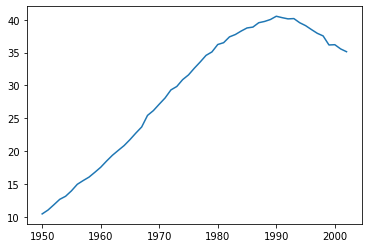

In [ ]:
plt.plot(years_deaths, deaths)

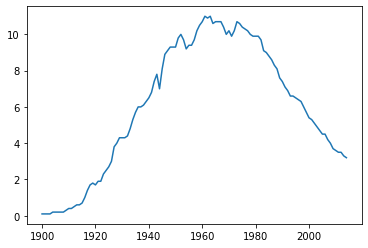

In [ ]:
plt.plot(years_sales, sales)

## Versione 2: doppio asse y

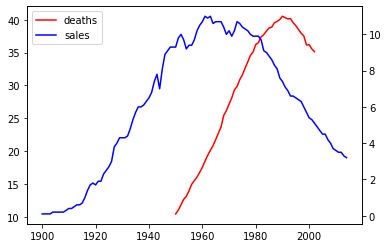

In [ ]:
# ci stiamo inoltrando in territorio più avanzato
# e dobbiamo creare l'oggetto "figura"
fig = plt.figure()

# "gca" sta per "get current axes", che nel linguaggio
# di matplotlib sono la "carta millimetrata" sulla quale mettere i dati
ax = plt.gca()

# twinx permette di ottenere un altro "foglio" di carta millimetrata
# corrispondente però agli stessi valori sulle x (ovvero, per noi, anni)
# e si possono allungare separatamente sulle y
ax2 = ax.twinx()

# ora quando diamo il comando "plot" dobbiamo specificare a quali 
# axes ci stiamo riferendo
ax.plot(years_deaths, deaths, label='deaths', c='red')
ax2.plot(years_sales, sales, label='sales', c='blue')

# fare una legenda quando ci sono più axes è leggermente più complicato
# il codice seguente prende le due legende e le mette insieme in una
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles+handles2, labels+labels2)

# alternativa:
# fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

## Versione 3: color-coding

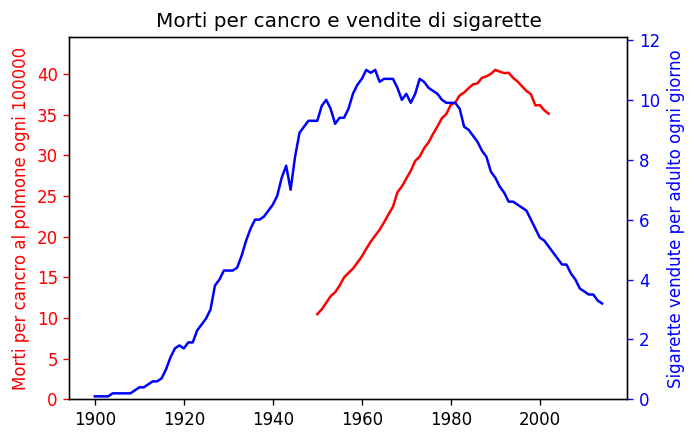

In [ ]:
# ci serviranno questi colori più volte, quindi li definiamo qui
# così, cambiarli sarà più semplice se ne avremo bisogno
death_color = 'red'
sales_color = 'blue'

fig = plt.figure()
ax = plt.gca()
ax2 = ax.twinx()

ax.plot(years_deaths, deaths, label='deaths', c=death_color)

# diamo lo stesso colore della curva all'asse y, in modo che
# sia chiaro a cosa si riferisce
# e aggiungiamo un'etichetta più estesa sull'asse stesso
ax.set_ylabel('Morti per cancro al polmone ogni 100000', c=death_color)
ax.tick_params(axis='y', colors=death_color)

ax2.plot(years_sales, sales, label='sales', c=sales_color)
ax2.set_ylabel('Sigarette vendute per adulto ogni giorno', c=sales_color)
ax2.tick_params(axis='y', colors=sales_color)

# diamo un titolo alla figura
ax.set_title('Morti per cancro e vendite di sigarette')

# facciamo partire entrambi gli assi da 0;
# lo dobbiamo fare manualmente definendo l'estensione delle y
# quindi andiamo da 0 a poco sopra il massimo per entrambe
ax.set_ylim(0, max(deaths)*1.1)
ax2.set_ylim(0, max(sales)*1.1)


# ora la legenda di prima diventa ridondante: possiamo rimuoverla.

# inoltre, aumentiamo leggermente la dimensione dell'immagine
fig.set_dpi(120)


## Versione 4: Æsthetic

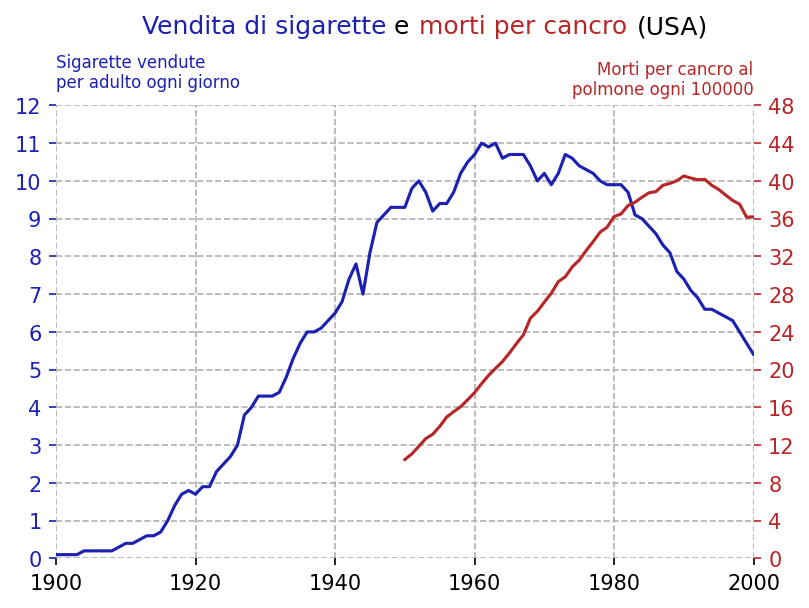

In [ ]:
# invece dei colori di default possiamo sceglierne uno 
# personalizzato con una stringa RGB, che troviamo con un
# color picker: https://g.co/kgs/v8tjCs
death_color = '#b82727'
sales_color = '#1c21b0'

fig = plt.figure()
ax = plt.gca()

ax2 = ax.twinx()

ax.plot(years_sales, sales, label='sales', c=sales_color)

# mettiamo il testo in orizzontale
ax.set_ylabel(
    'Sigarette vendute \nper adulto ogni giorno',
    c=sales_color,
    rotation='horizontal',
    size=8,
    ha='left') # horizontal alignment
ax.yaxis.set_label_coords(0.,1.03) # selezione della posizione
ax.tick_params(axis='y', colors=sales_color)

ax2.plot(years_deaths, deaths, label='deaths', c=death_color)
ax2.set_ylabel(
    'Morti per cancro al\npolmone ogni 100000',
    c=death_color,
    rotation='horizontal',
    size=8,
    ha='right')
ax2.yaxis.set_label_coords(1., 1.1)
ax2.tick_params(axis='y', colors=death_color)

# un dettaglio estetico: coloriamo il testo del titolo! 
# per farlo, dobbiamo dividerlo in pezzi
# e colorarli individualmente
fig.text(.22, 1., 'Vendita di sigarette', fontsize='large', color=sales_color)
fig.text(.5, 1., 'e', fontsize='large')
fig.text(.528, 1., 'morti per cancro', fontsize='large', color=death_color)

# possiamo includere il codice del paese di riferimento
fig.text(.77, 1., f'({CODE})', fontsize='large')

# per avere una griglia coerente fra i due assi y, 
# dobbiamo scegliere un rapporto fra di essi che sia un numero intero
deaths_by_sales = round(max(deaths) / max(sales))

# ora possiamo creare degli assi con lo stesso numero di ticks
ax_ticks = list(np.arange(0, max(sales) + 2))
ax2_ticks = list(np.arange(0, max(sales) + 2) * deaths_by_sales)

ax.set_yticks(ax_ticks)
ax2.set_yticks(ax2_ticks)

# e attivare la griglia, rendendola tratteggiata
ax.grid('on', ls='--') # ls sta per "linestyle"

# mentre disabilitiamo il rettangolo nero attorno alla figura
for spine in ax.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

# i limiti degli assi y devono corrispondere a quelli 
ax.set_ylim(ax_ticks[0], ax_ticks[-1])
ax2.set_ylim(ax2_ticks[0], ax2_ticks[-1])

# infine, il grafico ha l'aria più pulita se lo chiudiamo su un numero tondo come 2000
ax.set_xlim(1900, 2000)

fig.set_dpi(150)
